In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import f_classif
import seaborn as sns

In [3]:
df = pd.read_csv(r"/content/Advertising.csv")

In [4]:
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


LinearRegression()

In [8]:
y_pred = regression_model.predict(X_test)

In [9]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

Mean Absolute Error: 1.5116692224549086
Mean Squared Error: 3.79679723671522
Root Mean Squared Error: 1.9485372043446387


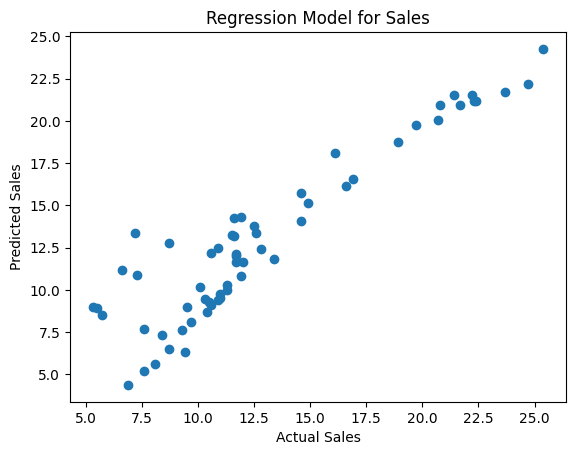

In [10]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Regression Model for Sales")
plt.show()

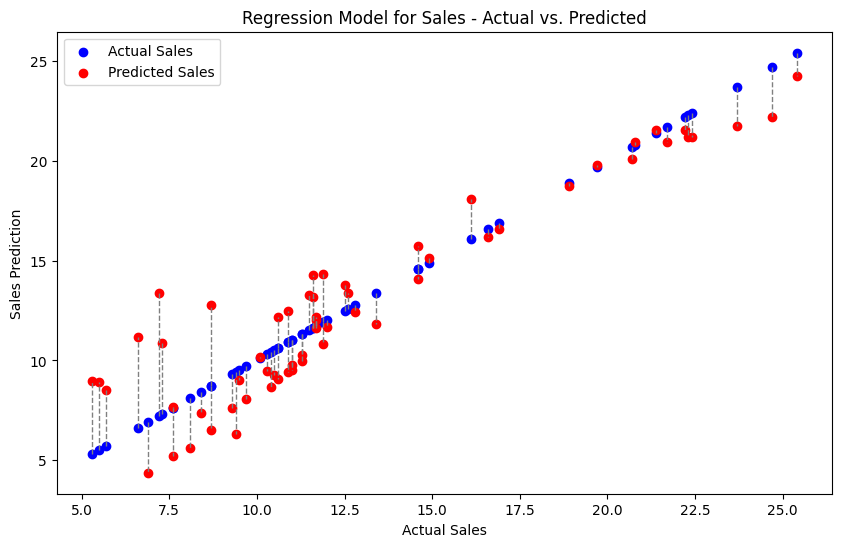

In [11]:
plt.figure(figsize=(10, 6))

# Plot actual values
plt.scatter(y_test, y_test, color='blue', label='Actual Sales')

# Plot predicted values
plt.scatter(y_test, y_pred, color='red', label='Predicted Sales')

# Connect the dots with lines
for i in range(len(y_test)):
    plt.plot([y_test.iloc[i], y_test.iloc[i]], [y_test.iloc[i], y_pred[i]], color='gray', linestyle='--', linewidth=1)

plt.xlabel("Actual Sales")
plt.ylabel("Sales Prediction")
plt.title("Regression Model for Sales - Actual vs. Predicted")
plt.legend()
plt.show()

In [12]:
credit_df = pd.read_csv("/content/Credit.csv")
credit_mod_df = pd.read_csv("/content/Credit-Modified.csv")

In [27]:
# Features and target variable for credit dataset
X_credit = credit_df.drop(['Unnamed: 0', 'Defaultee'], axis=1)
X_credit = pd.get_dummies(X_credit, columns=['Gender', 'Student', 'Married', 'Ethnicity'], drop_first=True)
y_credit = credit_df['Defaultee']

In [34]:
# Features and target variable for modified credit dataset
X_credit_mod = credit_mod_df.drop(['Unnamed: 0', 'Defaultee', 'dcat'], axis=1)
X_credit_mod = pd.get_dummies(X_credit_mod, columns=['Gender', 'Student', 'Married', 'Ethnicity'], drop_first=True)
y_credit_mod = credit_mod_df['Defaultee']

In [35]:
# Split data into training and testing sets
X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(X_credit, y_credit, test_size=0.3, random_state=42)
X_train_credit_mod, X_test_credit_mod, y_train_credit_mod, y_test_credit_mod = train_test_split(X_credit_mod, y_credit_mod, test_size=0.3, random_state=42)


In [36]:
# Create and fit logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_credit, y_train_credit)

# Make predictions
y_pred_credit = logreg_model.predict(X_test_credit)

# Evaluate model performance
accuracy_credit = accuracy_score(y_test_credit, y_pred_credit)
print(f"Logistic Regression Accuracy: {accuracy_credit}")


Logistic Regression Accuracy: 0.9416666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
# Create and fit SVM model
svm_model = SVC()
svm_model.fit(X_train_credit_mod, y_train_credit_mod)

# Make predictions
y_pred_credit_mod = svm_model.predict(X_test_credit_mod)

# Evaluate model performance
accuracy_credit_mod = accuracy_score(y_test_credit_mod, y_pred_credit_mod)
print(f"SVM Accuracy: {accuracy_credit_mod}")

SVM Accuracy: 0.8833333333333333


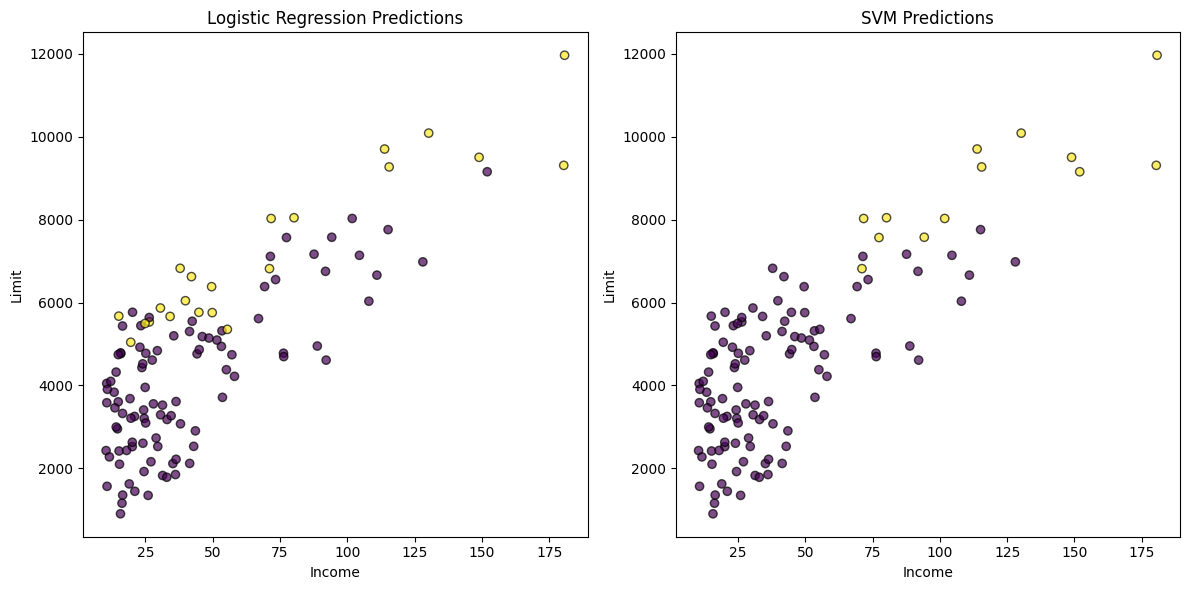

In [38]:
# Scatter plot for logistic regression
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test_credit['Income'], X_test_credit['Limit'], c=y_pred_credit, cmap='viridis', edgecolors='k', alpha=0.7)
plt.title('Logistic Regression Predictions')
plt.xlabel('Income')
plt.ylabel('Limit')

# Scatter plot for SVM
plt.subplot(1, 2, 2)
plt.scatter(X_test_credit_mod['Income'], X_test_credit_mod['Limit'], c=y_pred_credit_mod, cmap='viridis', edgecolors='k', alpha=0.7)
plt.title('SVM Predictions')
plt.xlabel('Income')
plt.ylabel('Limit')

plt.tight_layout()
plt.show()


In [39]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

Confusion Matrix for Logistic Regression:
[[96  5]
 [ 2 17]]


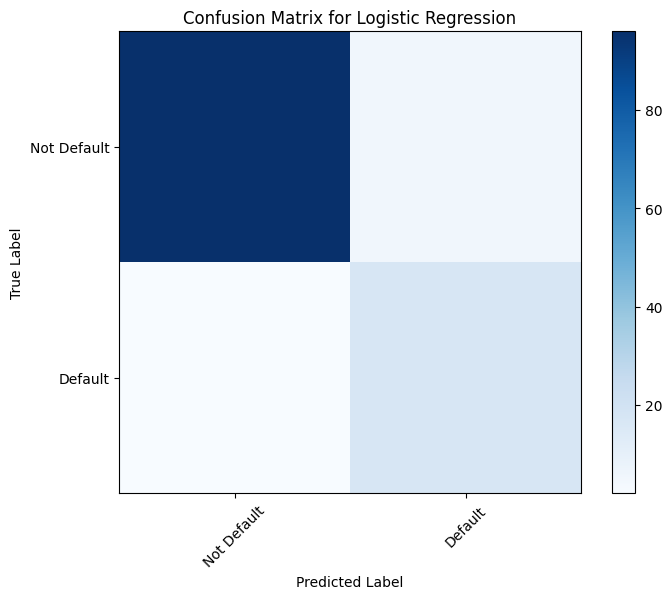

In [40]:
# Confusion Matrix for Logistic Regression
conf_matrix_logistic = confusion_matrix(y_test_credit, y_pred_credit)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_logistic)
# Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
plot_confusion_matrix(conf_matrix_logistic, classes=['Not Default', 'Default'], title='Confusion Matrix for Logistic Regression')
plt.show()

Confusion Matrix for SVM:
[[97  4]
 [10  9]]


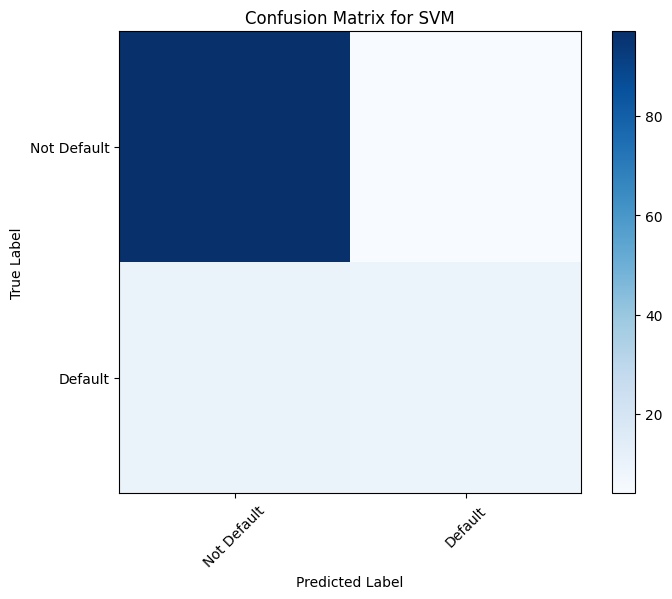

In [41]:
conf_matrix_svm = confusion_matrix(y_test_credit_mod, y_pred_credit_mod)
print("Confusion Matrix for SVM:")
print(conf_matrix_svm)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(conf_matrix_svm, classes=['Not Default', 'Default'], title='Confusion Matrix for SVM')
plt.show()

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Function to print precision, recall, and F1 score
def print_classification_metrics(y_true, y_pred, classifier_name):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"{classifier_name} Metrics:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\n")

In [43]:
print_classification_metrics(y_test_credit, y_pred_credit, "Logistic Regression")

Logistic Regression Metrics:
Precision: 0.7727
Recall: 0.8947
F1 Score: 0.8293




In [44]:
print_classification_metrics(y_test_credit_mod, y_pred_credit_mod, "SVM")

SVM Metrics:
Precision: 0.6923
Recall: 0.4737
F1 Score: 0.5625




In [45]:
f_statistic, p_value = f_classif(X_credit, y_credit)
anova_results = pd.DataFrame({'Feature': X_credit.columns, 'F-Statistic': f_statistic, 'P-Value': p_value})
print("Anova Test Results:")
print(anova_results)

Anova Test Results:
                Feature  F-Statistic       P-Value
0                Income    78.609099  2.571368e-17
1                 Limit   252.248530  2.396566e-44
2                Rating   259.693257  2.465673e-45
3                 Cards     4.025334  4.549784e-02
4                   Age     0.579367  4.470113e-01
5             Education     0.036607  8.483654e-01
6               Balance   494.736145  8.163230e-72
7           Gender_Male     0.004563  9.461796e-01
8           Student_Yes    33.242414  1.633990e-08
9           Married_Yes     0.313386  5.759248e-01
10      Ethnicity_Asian     0.036340  8.489131e-01
11  Ethnicity_Caucasian     0.045334  8.314999e-01


In [47]:
coefficients = logreg_model.coef_[0]
print("Logistic Regression Coefficients:")
print(coefficients)

Logistic Regression Coefficients:
[ 9.25712478e-02  1.35360236e-03 -5.86222357e-02  3.58475065e-04
 -3.92099784e-02 -6.10355584e-01  2.51578420e-02 -9.05988620e-02
 -2.07859366e-01 -1.78200584e-01 -1.22013285e-01  5.00126750e-02]
